In [293]:
using Plots; gr()
using Reproduce
using FileIO
using Statistics
using ProgressMeter
using JLD2
# data_home = "../data/experiment_2/Experiment2"
# data_home = "../Experiment2_ESarsa_NoExploration"
# data_home = "../Experiment2_NoExploringStarts"
# data_home = "../Experiment2_Non_Introspective"
# data_home = "../data/Experiment2_Introspective_And_Nonintrospective"
# data_home = "../data/Experiment2_Introspective"
# data_home = "../data/Revised_Experiment2"
# data_home = "../data/OneDTMaze_Revised"
data_home = "../Revised_Experiment2_Baselines"

"../Revised_Experiment2_Baselines"

In [294]:
include("./plot_utils.jl")
GPU = GeneralPlotUtils

Main.GeneralPlotUtils

In [295]:
# experiment_folders = ["../data/Experiment1 (copy)"]
# experiment_folders = ["../Experiment1"]
# experiment_folders = ["../data/Experiment1Final"]
experiment_folders = [data_home]

1-element Array{String,1}:
 "../Revised_Experiment2_Baselines"

In [298]:
data_key = :ttmaze_direct_error

:ttmaze_direct_error

In [300]:
ic = ItemCollection(joinpath(experiment_folders[1], "data"));
# ic = search(ic, Dict("exploring_starts" => "beg", "num_tiles" => 2))
diff(ic)

Dict{String,Array} with 5 entries:
  "demon_learner"     => ["Q", "SR"]
  "behaviour_learner" => ["FollowDemon", "GPI", "RandomDemons"]
  "seed"              => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  41, 42, 43, 44, 45,…
  "demon_update"      => ["ESARSA", "TB"]
  "eta"               => [0.04, 0.2, 1.0, 5.0]

In [301]:
# length(search(ic, Dict("demon_learner" => "LSTD")))
length(ic)

450

In [302]:
# algo_divisor_keys = ["behaviour_learner","behaviour_update","demon_learner", "demon_opt", "demon_update", "demon_alpha_init"]
# algo_divisor_keys = ["behaviour_learner", "behaviour_update", "demon_learner", "demon_opt"]
# algo_divisor_keys = ["behaviour_learner","behaviour_reward_projector", "demon_learner","num_tiles", "exploration_param", "exploring_starts"]
algo_divisor_keys = ["behaviour_learner", "demon_learner"]

# algo_divisor_keys = ["demon_learner"]
# algo_divisor_keys = ["behaviour_eta"]
# algo_divisor_keys = []
# sweep_params = ["demon_eta"]
# sweep_params = ["demon_eta", "behaviour_eta", "exploration_param"]
sweep_params = ["eta"]

algo_specs_full = GPU.split_algo(ic, algo_divisor_keys)
# algo_specs_full = ic

["behaviour_learner", "demon_learner"]


6-element Array{Any,1}:
 Dict{Any,Any}("demon_learner" => "Q","behaviour_learner" => "FollowDemon")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_learner" => "FollowDemon")
 Dict{Any,Any}("demon_learner" => "Q","behaviour_learner" => "GPI")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_learner" => "GPI")
 Dict{Any,Any}("demon_learner" => "Q","behaviour_learner" => "RandomDemons")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_learner" => "RandomDemons")

In [303]:
all_algos_ics = [search(ic,algo_spec) for algo_spec in algo_specs_full]
# all_algos_ics = [search(ic,algo_specs_full)]
length.(all_algos_ics)


6-element Array{Int64,1}:
 150
   0
   0
 150
 150
   0

In [305]:
valid_algos_ind = findall(a -> length(a) != 0, all_algos_ics)

algo_specs = algo_specs_full[valid_algos_ind]
algo_ics = all_algos_ics[valid_algos_ind]

3-element Array{ItemCollection,1}:
 ItemCollection(Reproduce.Item[Reproduce.Item("../Revised_Experiment2_Baselines/data/RP_0_0x10a441c81ed42dd3", Dict{String,Any}("logger_keys" => ["TTMAZE_ERROR", "TTMAZE_UNIFORM_ERROR", "TTMAZE_OLD_ERROR", "GOAL_VISITATION", "EPISODE_LENGTH", "INTRINSIC_REWARD", "TTMAZE_DIRECT_ERROR"],"steps" => 60000,"behaviour_learner" => "FollowDemon","exploration_param" => 0.1,"exploration_strategy" => "epsilon_greedy","use_external_reward" => true,"horde_type" => "regular","drifter" => [1.0, 0.1],"behaviour_w_init" => 10,"_GIT_INFO" => "0"…), ["logger_keys", "steps", "behaviour_learner", "exploration_param", "exploration_strategy", "use_external_reward", "horde_type", "drifter", "behaviour_w_init", "demon_lambda"  …  "demon_alpha_init", "exploring_starts", "demon_opt", "constant_target", "behaviour_alpha_init", "seed", "env_step_penalty", "demon_discounts", "demon_policy_type", "intrinsic_reward"]), Reproduce.Item("../Revised_Experiment2_Baselines/data/RP_0_0x15a

In [306]:
algo_specs

3-element Array{Any,1}:
 Dict{Any,Any}("demon_learner" => "Q","behaviour_learner" => "FollowDemon")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_learner" => "GPI")
 Dict{Any,Any}("demon_learner" => "Q","behaviour_learner" => "RandomDemons")

In [307]:
best_per_algo_ics = []
include("./plot_utils.jl")
GPU = GeneralPlotUtils
for (i,algo_ic) in enumerate(algo_ics)
    println(i)
#     push!(best_per_algo_ics, GPU.get_best(algo_ic,sweep_params, data_key))
    push!(best_per_algo_ics, GPU.get_best_final_perf(algo_ic,sweep_params, data_key, 0.1))

end

1
["eta"]


[1.798808052045146, 1.7986920822039658, 1.8870362307120183]
2
["eta"]
[0.12676001891425778, 1.4841622525236269, 3.6926629075825623]
3
["eta"]
[0.3442475754858355, 0.31526443044887953, 2.9409145552641487]


In [308]:
length.(best_per_algo_ics)

3-element Array{Int64,1}:
 50
 50
 50

In [309]:
data = [GPU.smooth(GPU.get_stats(GPU.load_results(ic,data_key))[1],10) for ic in best_per_algo_ics]
std = [GPU.smooth(GPU.get_stats(GPU.load_results(ic,data_key))[2],10) for ic in best_per_algo_ics]

size(GPU.load_results(best_per_algo_ics[1], data_key))
# GVF x timesteps x num_runs
# tst = GPU.load_results(best_per_algo_ics[1], data_key)
# size(tst)
# std(sum(tst,dims=1)[1,:,:], dims =2)
# methods(std)
# std(tst,dims=3)
# GPU.get_stats(GPU.load_results(best_per_algo_ics[1],data_key))[2]

(4, 1201, 50)

In [310]:
#Accidentally ran TabularRoundRobin at twice the loging frequency
# println(length(data[7]))

# if length(data[7]) > 300
#     odd_inds = [i for i in 1:2:length(data[6])]
# #     @show data[7]
#     data[7] = data[7][odd_inds]
#     std[7] = std[7][odd_inds]
# end

In [311]:
algo_specs
[GPU.print_params(algo, algo_divisor_keys, sweep_params) for algo in best_per_algo_ics]

For IC: 
behaviour_learner  FollowDemon
demon_learner  Q
eta  0.2

For IC: 
behaviour_learner  GPI
demon_learner  SR
eta  0.2

For IC: 
behaviour_learner  RandomDemons
demon_learner  Q
eta  0.2



3-element Array{Nothing,1}:
 nothing
 nothing
 nothing

In [312]:
label_keys = cat(algo_divisor_keys,sweep_params, dims = 1)
labels = [GPU.get_label(algo, label_keys) for algo in best_per_algo_ics]
labels = cat(labels..., dims=2)

1×3 Array{String,2}:
 " FollowDemon Q 0.2"  " GPI SR 0.2"  " RandomDemons Q 0.2"

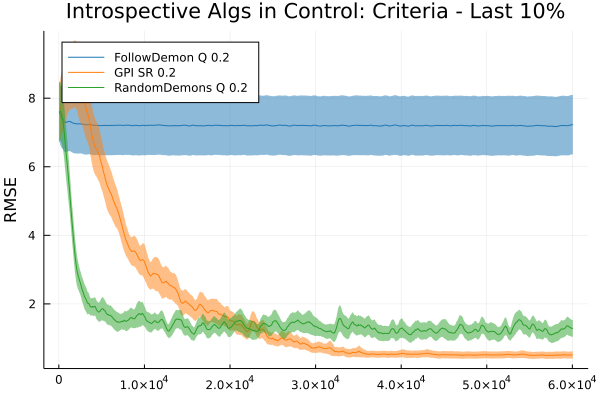

In [319]:
# labels = [GPU.get_label(algo, label_keys) for algo in best_per_algo_ics]
ylabel = "RMSE"
# title = "SR Demons & Step Size Adaptation vs More Naive Approaches"
title = "Introspective Algs in Control: Criteria - Last 10%"
step_increment=50
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
num_runs = 10
plot(xticks, data, ylabel=ylabel, palette=:tab10, label= labels, grid=true, ribbon = std/sqrt(num_runs), legend=:topleft, title=title)

In [320]:
savefig("./plots/experiment_2_revised/baselines_all.png")

In [314]:
data_per_gvf = [GPU.get_stats(GPU.load_results(ic,data_key), per_gvf = true)[1] for ic in best_per_algo_ics]
std_per_gvf = [GPU.get_stats(GPU.load_results(ic,data_key), per_gvf = true)[2] for ic in best_per_algo_ics]

3-element Array{Array{Float64,2},1}:
 [3.364483840036661e-16 3.364483840036661e-16 … 3.364483840036661e-16 3.364483840036661e-16; 1.8600488352288398 1.8600488352288398 … 1.8600488352288398 1.8600488352288398; 3.364483840036661e-16 0.3019367966941684 … 0.1425066615786015 0.13220311148680067; 1.9766540327239013 1.9766540327239013 … 1.9766540327239013 1.9766540327239013]
 [3.364483840036661e-16 0.0007992380074550418 … 0.30847472622757705 0.3084747276779205; 1.8600488352288396 1.8586984363558707 … 0.0010182364117751128 0.0010182339283642118; 3.364483840036661e-16 0.39366726489351267 … 0.09716259624796335 0.08550215530347235; 1.9766540327239013 1.9766540327239013 … 0.0009418197459388732 0.000941275012279052]
 [3.364483840036661e-16 0.0327135028304694 … 0.2382867577979195 0.24023762502465443; 1.8600488352288398 1.8361354788859792 … 9.962532375387303e-16 9.956548388157496e-16; 3.364483840036661e-16 0.39706405824746266 … 0.7256247368965246 0.7734633822950154; 1.9766540327239017 1.9599584507528

In [315]:
std_per_gvf[1][1,:]

1201-element Array{Float64,1}:
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 ⋮
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16
 3.364483840036661e-16

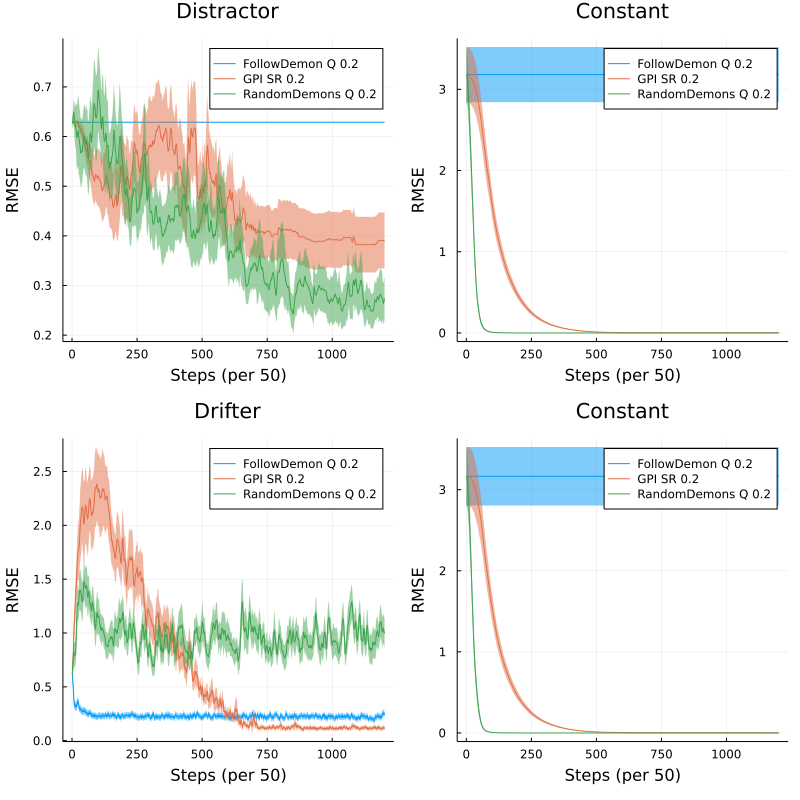

In [321]:
num_gvfs = 4
ps = []
gvf_labels = ["Distractor" "Constant" "Drifter" "Constant"]
for gvf_ind in 1:num_gvfs
    p = plot()
    for algo_ind in 1:length(data_per_gvf)
        smooth_gvf = GPU.smooth(data_per_gvf[algo_ind][gvf_ind,:],5)
        plot!(p,smooth_gvf, ribbon = std_per_gvf[algo_ind][gvf_ind,:] / sqrt(30), size = (500,500),label = labels[algo_ind])
        plot!(xlabel="Steps (per 50)", ylabel = "RMSE",  title = gvf_labels[gvf_ind])
    end
    push!(ps,p)
end
plot(ps..., layout=(2,2), size = (800,800))
        

In [322]:
savefig("./plots/experiment_2_revised/baselines.png")

In [253]:
ps = []
inds_to_care = [1:4,5:8,9:13,14:18]
for inds in inds_to_care
    ylabel = "RMSE"
    title = ""
    step_increment=100
    num_samples = length(data[1])
    xticks=collect(step_increment:step_increment:num_samples*step_increment)
    num_runs = 50
    ribbon_std_err = std[inds] / sqrt(num_runs)
    p = plot(xticks, data[inds], ylabel=ylabel, palette=:tab10, label= labels[:,inds], grid=true, ribbon = ribbon_std_err, legend=:topright, title=title)
    push!(ps,p)
end
plot(ps..., size = (800,800))

LoadError: [91mBoundsError: attempt to access 8-element Array{Array{Float64,1},1} at index [9:13][39m

In [106]:
savefig("./plots/experiment_2_revised/introspective_metastepsize_longer.png")

In [662]:
#Replicating plot from Experiment 1.
# inds_to_replicate = [1,3,4,8]
inds_to_replicate = [5,6,7,8,9,15,16,17,18,19]
label_subset = labels[:,inds_to_replicate]
data_subset = data[inds_to_replicate]
@show length(std)
label_subset

length(std) = 20


1×10 Array{String,2}:
 " GPI TB Q 0.5 0.2 0.04"  …  " Q ESARSA SR 0.4 0.2 0.04"

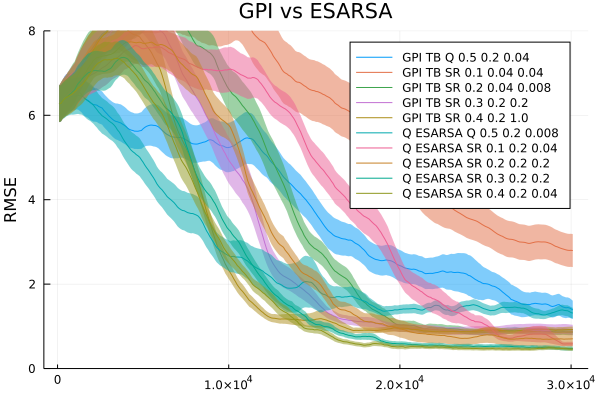

In [663]:
# title = "High vs Low Alpha Init"
title = "GPI vs ESARSA"
ylabel = "RMSE"
step_increment=100
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
plot(xticks, data_subset,ylabel= ylabel, label= label_subset, ribbon = std[inds_to_replicate]/sqrt(30), legend=:topright, title=title, ylims=(0,8))

In [646]:
savefig("./plots/experiment2/no_exploring_starts/top_2_algos.png")

In [664]:
for e in diff(ic)["exploration_param"]
    @show e
end

e = 0.1
e = 0.2
e = 0.3
e = 0.4
e = 0.5


In [234]:
inds_to_replicate = [5,6,7]
label_subset = labels[:,inds_to_replicate]
data_subset = data[inds_to_replicate]

4-element Array{Array{Float64,1},1}:
 [1.9181099487646451, 2.0293219787507892, 2.085500089730406, 2.1689908079448075, 2.2267692104209766, 2.2703040034826185, 2.321169368235307, 2.3694877705617365, 2.409609985125206, 2.4335928301580863  …  0.9202426225583491, 0.9094567620515683, 0.8949646678312002, 0.8838595427302247, 0.8768503837289027, 0.8714859484719932, 0.8610139435489085, 0.8538226379306533, 0.8480630649001251, 0.8428000492118735]
 [1.9537244996467416, 2.04516135675983, 2.0638841109262476, 2.088796053561995, 2.128620228840288, 2.1589135181746393, 2.191951729637584, 2.2189263973752857, 2.226499963947538, 2.2381940037899923  …  0.13975068060644436, 0.13572326379560615, 0.1339151639546532, 0.13258783439051863, 0.13557591606790742, 0.13610094537458237, 0.135439184595546, 0.13298289258891952, 0.1366094642283759, 0.13732975941501385]
 [1.9689353649783379, 2.0474267071912893, 2.072770850159802, 2.112071594340513, 2.156473418090883, 2.2077415614232145, 2.241628747920714, 2.2539388901783086

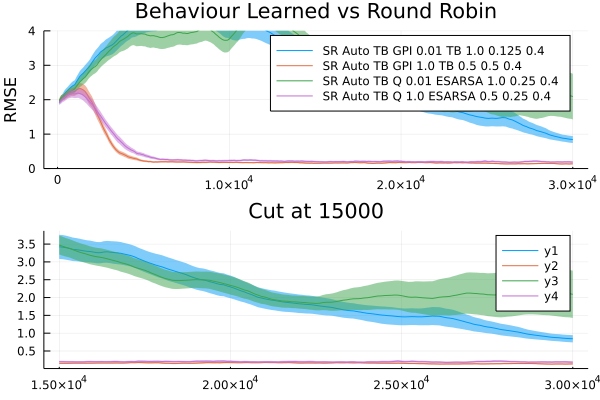

In [235]:
title = "Behaviour Learned vs Round Robin"
ylabel = "RMSE"
step_increment=100
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
p1 = plot(xticks, data_subset,ylabel= ylabel, label= label_subset, ribbon = std[inds_to_replicate]/sqrt(30), legend=:topright, title=title, ylims=(0,4))

start_pos = 150
new_x_ticks = collect(step_increment * start_pos:step_increment:num_samples*step_increment)
data_subset_cut = [s[start_pos:end] for s in data_subset]
std_subset_cut = [s[start_pos:end] for s in std[inds_to_replicate]/sqrt(30)]
p2 = plot(new_x_ticks,data_subset_cut, ribbon = std_subset_cut, title="Cut at $(step_increment * start_pos)")

plot(p1,p2, layout = (2,1), figsize=(20,20))


In [203]:
savefig("./plots/experiment2/learned_vs_round_robin.png")

In [257]:
episode_lengths = [GPU.load_results(ic,:episode_length, return_type = "array") for ic in best_per_algo_ics]
# visit_orders = [GPU.load_results(ic,:visit_order, return_type = "array") for ic in best_per_algo_ics]

8-element Array{Array{Any,1},1}:
 [[348, 467, 966, 493, 57726], [214, 493, 870, 104, 90, 321, 102, 346, 118, 166  …  79, 79, 42, 74, 39, 63, 49, 62, 70, 88], [309, 397, 312, 58982], [279, 381, 242, 178, 360, 58560], [464, 570, 58966], [307, 434, 162, 289, 388, 582, 660, 5339, 2187, 2060  …  57, 69, 53, 68, 93, 71, 51, 50, 62, 58], [438, 26477, 151, 515, 720, 340, 114, 117, 202, 116  …  62, 44, 59, 75, 58, 57, 178, 82, 101, 9], [270, 319, 307, 15790, 394, 159, 402, 197, 81, 112  …  64, 59, 50, 61, 147, 70, 95, 93, 93, 37], [360, 363, 59277], [392, 390, 1356, 383, 324, 755, 3326, 323, 333, 208  …  94, 157, 63, 54, 127, 87, 61, 241, 255, 88]]
 [[280, 59343, 377], [231, 469, 31544, 1539, 700, 1670, 2377, 2511, 368, 1268, 1321, 807, 943, 1062, 248, 493, 4418, 2342, 4399, 1290], [343, 4109, 294, 373, 247, 12486, 358, 152, 520, 249  …  87, 51, 69, 147, 115, 84, 59, 149, 70, 69], [258, 439, 57986, 266, 167, 271, 137, 182, 294], [340, 487, 11409, 7078, 1006, 587, 2889, 3171, 266, 1973  …  74, 6

In [258]:
length(visit_orders[1][7])
# length(episode_lengths[1][7])

5107

(sum(num_episodes), labels[ind]) = (2893, " Q ideal_martha Q 2 0.2 beg 0.008")
(sum(num_episodes), labels[ind]) = (1557, " Q ideal_martha Q 2 0.4 beg 0.04")
(sum(num_episodes), labels[ind]) = (48, " Q ideal_martha Q 4 0.2 beg 0.04")
(sum(num_episodes), labels[ind]) = (878, " Q ideal_martha Q 4 0.4 beg 0.04")
(sum(num_episodes), labels[ind]) = (664, " Q ideal_martha SR 2 0.2 beg 0.2")
(sum(num_episodes), labels[ind]) = (1752, " Q ideal_martha SR 2 0.4 beg 0.2")
(sum(num_episodes), labels[ind]) = (51, " Q ideal_martha SR 4 0.2 beg 0.04")
(sum(num_episodes), labels[ind]) = (86, " Q ideal_martha SR 4 0.4 beg 0.2")


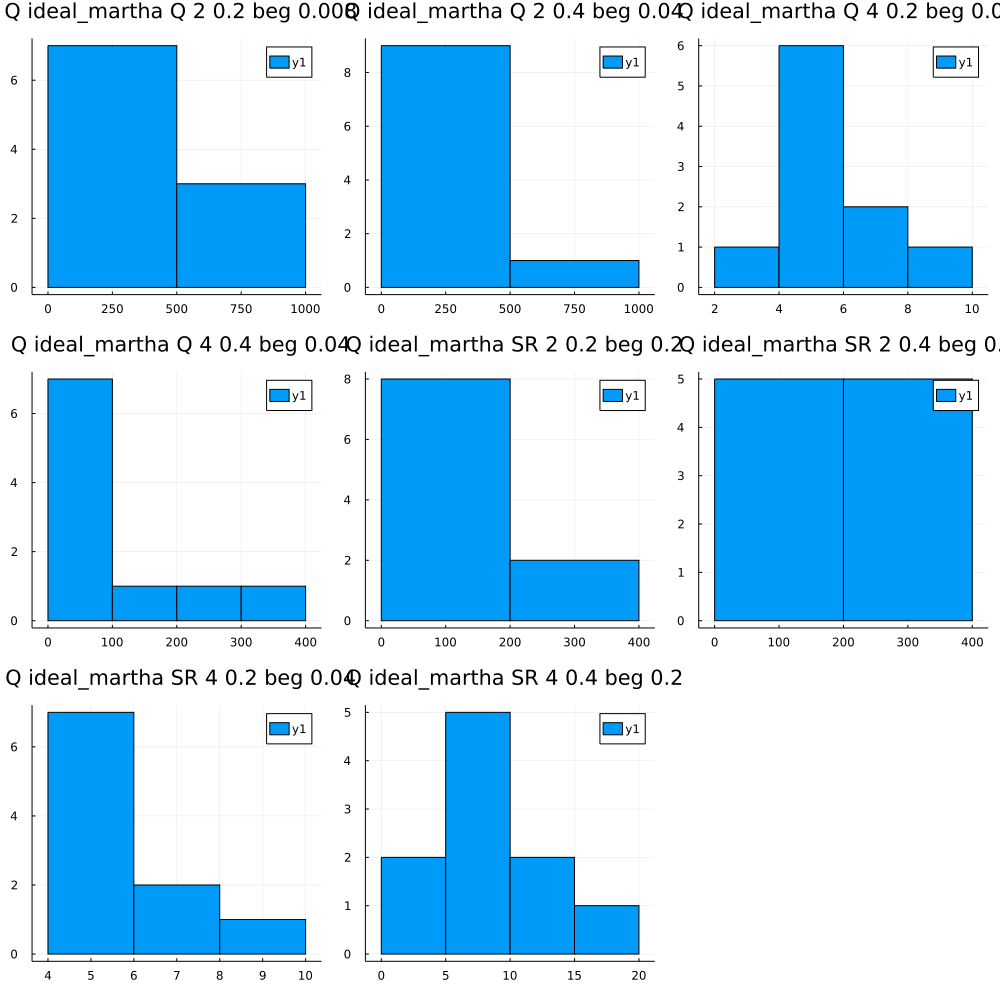

In [264]:
ps = []
for ind in 1:length(episode_lengths)
    num_episodes = [length(e) for e in episode_lengths[ind]]
    @show sum(num_episodes), labels[ind]
    p = histogram(num_episodes)
    title!(labels[ind])
    push!(ps,p)
end

plot(ps..., size = (1000,1000))

In [174]:
savefig("./plots/onedtmaze_revised/episode_lengths.png")

In [261]:
data_per_run = [GPU.load_results(ic,data_key) for ic in best_per_algo_ics]
data_per_run[1]

4×601×10 Array{Float64,3}:
[:, :, 1] =
 0.318833   0.318833   0.318833   …  0.302596   0.302596   0.302596
 0.0687011  0.0687011  0.0687011     0.0687011  0.0687011  0.0687011
 0.315915   0.92993    1.42953       4.29232    4.43153    5.00992
 2.39876    2.39876    2.39876       1.95295    1.95295    1.95295

[:, :, 2] =
 0.318833  0.318833  0.318833  0.318833  …  0.215034  0.215092  0.214962
 2.31899   2.31899   2.31899   2.19446      1.71309   1.71362   1.71235
 0.315915  0.698957  0.637059  1.24553      1.80351   1.90025   2.01033
 0.834286  0.834286  0.834286  0.834286     0.101102  0.101529  0.101985

[:, :, 3] =
 0.318833  0.318833   0.318833  0.318833  …   0.270468   0.270468   0.270468
 0.797324  0.797324   0.797324  0.797324      0.717215   0.717215   0.717215
 0.315915  0.0280785  0.249171  0.265512     10.5613    10.7635    10.3953
 0.151281  0.151281   0.151281  0.151281      0.151281   0.151281   0.151281

[:, :, 4] =
 0.318833  0.318833  0.318833  0.703041  …  0.659541  0

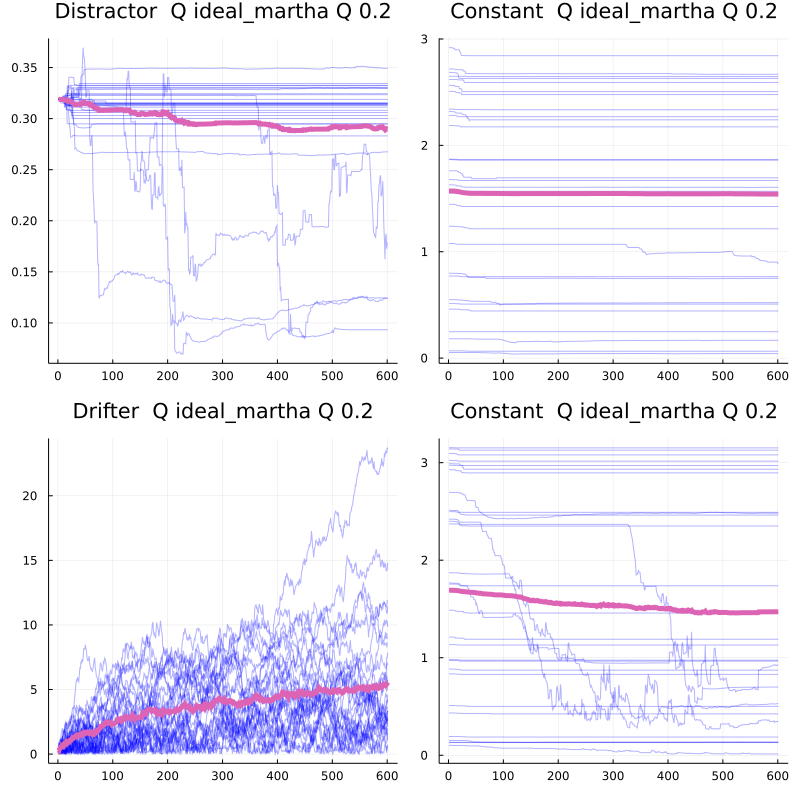

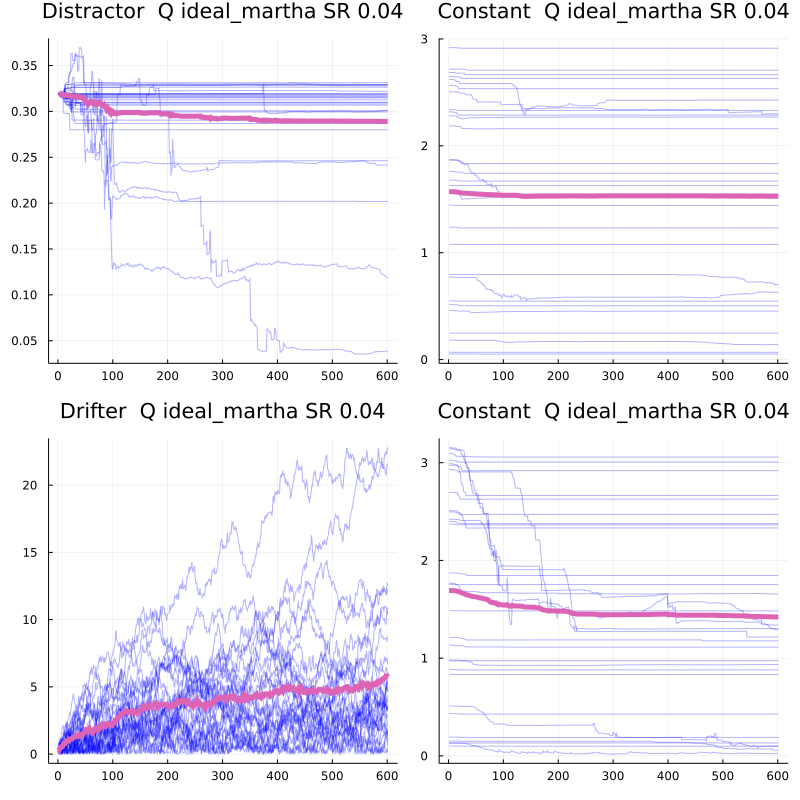

LoadError: [91mBoundsError: attempt to access 1×2 Array{String,2} at index [3][39m

In [200]:
for ind in 1:length(data_per_run)
    ps = []
    d = data_per_run[ind]
    for gvf_i in 1:4
        p = plot(d[gvf_i,:,:], linecolor=:blue, linealpha=0.3, label = "")
        plot!(mean(d[gvf_i,:,:], dims = 2), linewidth=5, label = "")
        title!(string(gvf_labels[gvf_i], " ", labels[ind]))
        push!(ps,p)
    end
    full_p = plot(ps..., size = (800,800))
    display(full_p)
    savefig("./plots/onedtmaze_revised/RMSE_per_run_$(labels[ind]).png")
end


In [130]:
maximum([e[end-1] for e in episode_lengths[2]])

30426

In [131]:
max_lengths = [GPU.get_min_length(arrs)-1 for arrs in episode_lengths]

4-element Array{Int64,1}:
 5
 6
 1
 1

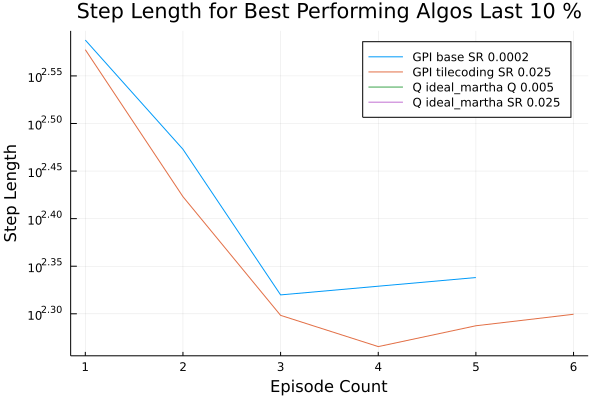

In [132]:
p = plot(xlabel = "Episode Count", ylabel = "Step Length")
for (ind,episode_lengths) in enumerate(episode_lengths)
    l = hcat([epi[1:max_lengths[ind]] for epi in episode_lengths]...)
    plot!(p,mean(l,dims=2), label = labels[ind],yaxis=:log)
end
title!("Step Length for Best Performing Algos Last 10 %")
# p = plot(mean(episode_lengths,dims=2), xlabel="Episode Count", ylabel="Step Length", hline=5.5)
display(p)
savefig("./plots/experiment_2_revised/step_length_longer_last_10.png")

In [202]:
# include("./plot_utils.jl")
# GPU = GeneralPlotUtils
gvf_labels = ["Distractor" "Constant" "Drifter" "Constant"]

1×4 Array{String,2}:
 "Distractor"  "Constant"  "Drifter"  "Constant"

In [203]:
ps = []
for i in 1:length(visit_orders)
    visit_perc = GPU.goal_visits_per_episode(visit_orders[i], max_lengths[i])
    @show size(visit_perc)
#     @show size(GPU.smooth(visit_perc, 5))
#     if size(visit_perc)[2] != 0
#         smooth_visit_perc = GPU.smooth(visit_perc, 5)
#     end
    tmp = [GPU.smooth(visit_perc[i,:],20) for i in 1:4] 
    p = plot(tmp, labels = gvf_labels, xlabel="Episode Count", ylabel="Fraction of Goal Visits", ylim=(0.0,1.0), title = string(labels[i], " Last 10%"), xaxis=:log, size = (800,1000), legend=:topleft)
    push!(ps,p)
end
println()
@show length(visit_orders)
# plot(ps..., layout = (1,3))
# display(plot(ps...,layout = (2,1)))
# display(plot(ps...))
display(plot(ps..., layout=(3,2)))
# savefig("./plots/experiment_2_revised/goal_visits_introspective_longer_last_10.png")

size(visit_perc) = (4, 5)
size(visit_perc) = (4, 6)
size(visit_perc) = (4, 1)


LoadError: [91mBoundsError: attempt to access 1×2 Array{String,2} at index [3][39m

In [204]:
irs = [GPU.load_results(ic,:intrinsic_reward) for ic in best_per_algo_ics]

p = plot()
for (i,ir) in enumerate(irs)
    @show size(ir)
    l = mean(ir[:,1,:], dims=2)
    l = GPU.smooth(l,5)
    plot!(l,label=labels[:,i])
end
title!("Intrinsic Reward")
xlabel!("Steps (per 100)")
ylabel!("Intrinsic Reward")
display(p)
    

LoadError: [91mArgumentError: No file exists at given path: ../OneDTMaze_Revised/data/RP_0_0x20a54aa8a5566f5f/results.jld2[39m

In [129]:
savefig("./plots/experiment_2_revised/intrinsic_reward_introspective_longer_last_10.png")

In [262]:
num_gvfs = 4
ps = []
for i in 1:length(visit_orders)
    visitation = zeros(num_gvfs, num_gvfs)
    for run in 1:length(visit_orders[i])
        if length(visit_orders[i][run]) != 0
            first_visit = visit_orders[i][run][1]
#         @show first_visit
            goals = unique(visit_orders[i][run])
#         @show goals
            visitation[first_visit,goals] .+= 1
        end
    end
    @show maximum(visitation,dims=2)
    visitation = visitation ./ vec(maximum(visitation,dims=2))
    push!(ps, heatmap(visitation, title = labels[i], size = (1000,1300), c = :grayC))

end
plot(ps..., layout=(2,2))

maximum(visitation, dims = 2) = [0.0; 0.0; 50.0; 0.0]
maximum(visitation, dims = 2) = [12.0; 14.0; 11.0; 13.0]
maximum(visitation, dims = 2) = [12.0; 19.0; 9.0; 10.0]
maximum(visitation, dims = 2) = [8.0; 11.0; 15.0; 16.0]
maximum(visitation, dims = 2) = [10.0; 11.0; 12.0; 17.0]
maximum(visitation, dims = 2) = [14.0; 10.0; 17.0; 9.0]


LoadError: [91mWhen doing layout, n (4) != n_override (6).  You're probably trying to force existing plots into a layout that doesn't fit them.[39m

In [447]:
data_per_gvf = [GPU.get_stats(GPU.load_results(ic,data_key), per_gvf=true)[1] for ic in best_per_algo_ics]
std_per_gvf = [GPU.get_stats(GPU.load_results(ic,data_key), per_gvf=true)[2] for ic in best_per_algo_ics]

7-element Array{Array{Float64,2},1}:
 [0.0583830341159143 0.06624647800274217 … 0.025331506725205462 0.024397293962268633; 0.03889287145799879 0.03446226870970493 … 0.014794991119714154 0.01528194549588694; 0.3079138638493579 0.35845048085670994 … 0.9572012726441534 0.9556570344074108; 0.035480788145793404 0.031832843362199124 … 0.015620569934822087 0.01531906940544899]
 [0.05746913114522719 0.060282673279872516 … 0.06374158349618055 0.0663021718397726; 0.04238311595926881 0.04003501526891254 … 0.05524423798772834 0.05587831566970883; 0.3171130805123134 0.3811126732560389 … 0.5272433890472962 0.5564420792754703; 0.04308688359476702 0.04525075299928103 … 0.051676072712286886 0.0507582939644684]
 [0.08544790467545224 0.06717454621790661 … 0.08152217411938359 0.08263905464901689; 0.06831416291205408 0.04849036245726658 … 0.06357413347350213 0.06104375465736899; 0.27642337654811006 0.2944612366188357 … 0.44236477127168583 0.392611894224175; 0.05330815977525475 0.04235849230265052 … 0.06063

In [382]:
GPU.get_stats(GPU.load_results(best_per_algo_ics[1],data_key), per_gvf=true)[2]

4×40 Array{Float64,2}:
 0.058383   0.0662465  0.0679944  …  0.0257236  0.0253315  0.0243973
 0.0388929  0.0344623  0.0264279     0.0146811  0.014795   0.0152819
 0.307914   0.35845    0.380958      0.934579   0.957201   0.955657
 0.0354808  0.0318328  0.0251053     0.016249   0.0156206  0.0153191

In [420]:
data[1] .== data[3]

4×40 BitArray{2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0

In [446]:
inds_to_replicate

4-element Array{Int64,1}:
 1
 2
 3
 6

In [451]:
ps = []
for ind in inds_to_replicate
    label_subset = labels[:,ind]
    data_subset = data_per_gvf[ind]
    std_subset = std_per_gvf[ind]
    @show size(std_subset)
    xticks=collect(step_increment:step_increment:num_samples*step_increment)
    p = plot(xticks,data_subset',label= ["Distractor" "Const" "Drifter" "Const"], ribbon = (std_subset/sqrt(100))', legend=:bottomleft, title=labels[ind], ylims=(0,1.25))
    push!(ps,p)
end

size(std_subset) = (4, 40)
size(std_subset) = (4, 40)
size(std_subset) = (4, 40)
size(std_subset) = (4, 40)


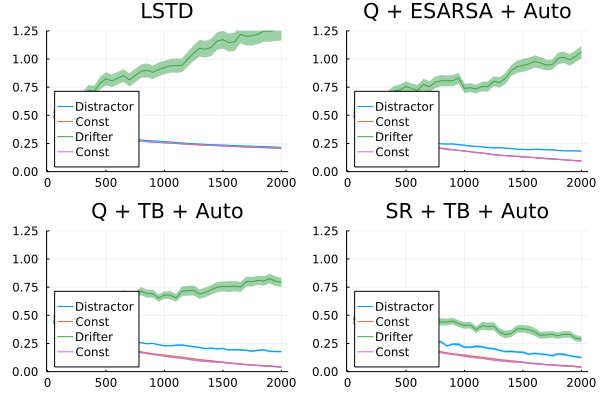

In [452]:
plot(ps..., layout=(2,2))

In [453]:
savefig("./plots/TabTMazeRoundRobin_per_gvf.png")